In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cleaning the data

In [96]:
training_df = pd.read_csv('cs-training.csv')
training_df = training_df.dropna()
training_df = training_df.drop(columns=['Unnamed: 0'])

print(len(training_df))
print(training_df.head(5))

120269
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                     

### Random forest

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

features_count = len(df.columns) - 1
X = df.drop(columns=['Financial Distress'], axis=1).to_numpy().reshape(-1, features_count)
y = df['Financial Distress'].to_numpy()
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
folds = KFold(n_splits=5, shuffle=True, random_state=1)

rmse_train_scores = []
r2_train_scores = []
y_cv_train_pred = np.zeros_like(y_trainval)
rmse_val_scores = []
r2_val_scores = []
y_cv_val_pred = np.zeros_like(y_trainval)
rf = RandomForestRegressor(n_estimators=200, max_features='log2', max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=1)
for train_index, val_index in folds.split(X_trainval):
    X_train, X_val = X_trainval[train_index], X_trainval[val_index]
    y_train, y_val = y_trainval[train_index], y_trainval[val_index]
    rf.fit(X_train, y_train)
    # training
    y_train_pred = rf.predict(X_train)
    y_cv_train_pred[train_index] = y_train_pred
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_train_scores.append(r2_score(y_train, y_train_pred))
    # validation
    y_val_pred = rf.predict(X_val)
    y_cv_val_pred[val_index] = y_val_pred
    rmse_val_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2_val_scores.append(r2_score(y_val, y_val_pred))
print(f"Training error (RMSE): {np.mean(rmse_train_scores):.2f}")
print(f"Validation error (RMSE): {np.mean(rmse_val_scores):.2f}")
print(f"Training error (R2): {np.mean(r2_train_scores):.2f}")
print(f"Validation error (R2): {np.mean(r2_val_scores):.2f}")

rf.fit(X_trainval, y_trainval)
y_test_pred = rf.predict(X_test)
rf_mse_score = mean_squared_error(y_test, y_test_pred)
rf_rmse_score = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_r2_score = r2_score(y_test, y_test_pred)

print(f"Test error (MSE): {rf_mse_score:.2f}")
print(f"Test error (RMSE): {rf_rmse_score:.2f}")
print(f"Test error (R2): {rf_r2_score:.2f}")

Training error (RMSE): 1.19
Validation error (RMSE): 1.38
Training error (R2): 0.70
Validation error (R2): 0.53
Test error (MSE): 0.35
Test error (RMSE): 0.59
Test error (R2): 0.72


### Vizualize tha data or sumn

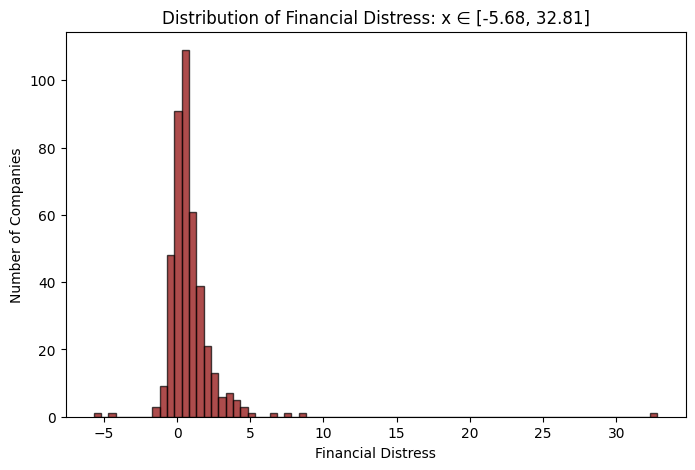

Number of companies with financial distress (under -0.5): 29
Number of companies with financial distress (over -0.5): 393


In [81]:
# Plotting the distribution of Financial Distress
# Splitting values into bins with step of 0.5
bins = np.arange(min(df['Financial Distress']), max(df['Financial Distress']) + 0.5, 0.5)

# Show histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Financial Distress'], bins=bins, color="darkred", edgecolor='black', alpha=0.7)
plt.title(f"Distribution of Financial Distress: x ∈ [{min(df['Financial Distress']):.2f}, {max(df['Financial Distress']):.2f}]")
plt.xlabel('Financial Distress')
plt.ylabel('Number of Companies')
plt.show()

under_count = len(df[df['Financial distress bin'] == 0])
over_count = len(df[df['Financial distress bin'] == 1])

print(f"Number of companies with financial distress (under -0.5): {under_count}")
print(f"Number of companies with financial distress (over -0.5): {over_count}")

### Logistic regression

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_trainval, y_trainval)

y_pred = lin_reg_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

670105395.2036577
-541410640.8479253
